# ISB02303402 Data Science
## ALP - Social Media Usage and Emotional Well-Being

### What is this data :
This data was made by AI Inventor Emirhan BULUT. The data shows how social media engagements affects the mental wellbeing of the user. This dataset contains 3 files : 

-train.csv: Data for training models.

-test.csv: Data for testing models.

-val.csv: Data for validation purposes.

##### Dataset source : https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-being/code

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [3]:
# Change the Path before coding

train_path = r'C:\Users\{...}. Tugas\Data Science\ALP\archive\train.csv'
test_path = r'C:\Users\{...}. Tugas\Data Science\ALP\archive\test.csv'
val_path = r'C:\Users\{...}. Tugas\Data Science\ALP\archive\val.csv'

In [4]:
train_df = pd.read_csv(train_path, on_bad_lines='skip')
test_df = pd.read_csv(test_path, on_bad_lines='skip')
val_df = pd.read_csv(val_path, on_bad_lines='skip')

In [5]:
print("Training Data:")
display(train_df)
print("----------------------------------------------------------------------")
print("Testing Data:")
display(test_df)
print("----------------------------------------------------------------------")
print("Validation Data:")
display(val_df)

Training Data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom
...,...,...,...,...,...,...,...,...,...,...
996,996,33,Non-binary,Twitter,85.0,4.0,35.0,18.0,18.0,Boredom
997,997,22,Female,Facebook,70.0,1.0,14.0,6.0,10.0,Neutral
998,998,35,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
999,999,28,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger


----------------------------------------------------------------------
Testing Data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral
...,...,...,...,...,...,...,...,...,...,...
98,184,22,Male,Twitter,70,1,20,5,22,Neutral
99,896,33,Male,LinkedIn,85,4,35,18,18,Boredom
100,708,24,Non-binary,Facebook,110,6,35,23,25,Sadness
101,993,24,Male,Telegram,75,3,37,16,22,Neutral


----------------------------------------------------------------------
Validation Data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,10,31,Male,Instagram,170,5,80,20,35,Happiness
1,877,32,Female,Instagram,155,6,75,25,38,Happiness
2,230,26,Non-binary,Facebook,45,1,8,4,12,Sadness
3,876,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
4,376,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
...,...,...,...,...,...,...,...,...,...,...
140,277,27,Non-binary,LinkedIn,55,1,9,2,11,Anxiety
141,830,26,Non-binary,Facebook,45,1,8,4,12,Sadness
142,109,29,Female,LinkedIn,55,2,15,5,10,Neutral
143,99,21,Female,Facebook,75,2,25,13,19,Anxiety


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     103 non-null    int64 
 1   Age                         103 non-null    int64 
 2   Gender                      103 non-null    object
 3   Platform                    103 non-null    object
 4   Daily_Usage_Time (minutes)  103 non-null    int64 
 5   Posts_Per_Day               103 non-null    int64 
 6   Likes_Received_Per_Day      103 non-null    int64 
 7   Comments_Received_Per_Day   103 non-null    int64 
 8   Messages_Sent_Per_Day       103 non-null    int64 
 9   Dominant_Emotion            103 non-null    object
dtypes: int64(7), object(3)
memory usage: 8.2+ KB


In [8]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     145 non-null    int64 
 1   Age                         145 non-null    object
 2   Gender                      145 non-null    object
 3   Platform                    145 non-null    object
 4   Daily_Usage_Time (minutes)  145 non-null    int64 
 5   Posts_Per_Day               145 non-null    int64 
 6   Likes_Received_Per_Day      145 non-null    int64 
 7   Comments_Received_Per_Day   145 non-null    int64 
 8   Messages_Sent_Per_Day       145 non-null    object
 9   Dominant_Emotion            144 non-null    object
dtypes: int64(5), object(5)
memory usage: 11.5+ KB


#### Cheking the amount of rows in each csv file

In [9]:
print(f"There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in the training data.")
print(f"There are {test_df.shape[0]} rows and {test_df.shape[1]} columns in the testing data.")
print(f"There are {val_df.shape[0]} rows and {val_df.shape[1]} columns in the validation data.")

There are 1001 rows and 10 columns in the training data.
There are 103 rows and 10 columns in the testing data.
There are 145 rows and 10 columns in the validation data.


#### Checking if there is any null values

In [10]:
print("Training Data:")
train_df.isnull().sum()

Training Data:


User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

In [11]:
print("Testing Data:")
test_df.isnull().sum()

Testing Data:


User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [12]:
print("Validation Data:")
val_df.isnull().sum()

Validation Data:


User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              1
dtype: int64

#### Here we found some null values. We decided to fill the nulls with either mean, median or mode. We also found irrelevant values in the gender collumn so we will will drop them too.

##### Checking the values before modification

In [13]:
train_df['Age'].unique()

array(['25', '30', '22', '28', '33', '21', '27', '24', '29', '31', '23',
       '26', '34', '35', '32', 'Male', 'Female', 'Non-binary',
       ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:'],
      dtype=object)

In [14]:
train_df['Gender'].unique()

array(['Female', 'Male', 'Non-binary', '27', '24', '29', '33', '31', '22',
       '25', '28', '30', '23', '34', '26', '35', '21', '32', nan],
      dtype=object)

In [15]:
train_df['Platform'].unique()

array(['Instagram', 'Twitter', 'Facebook', 'LinkedIn', 'Whatsapp',
       'Telegram', 'Snapchat', nan], dtype=object)

In [16]:
train_df['Posts_Per_Day'].unique()

array([ 3.,  5.,  2.,  8.,  1.,  4.,  6.,  7., nan])

In [17]:
train_df['Likes_Received_Per_Day'].unique()

array([ 45.,  20.,  15., 100.,   5.,  60.,  30.,  25.,  10.,  80.,  35.,
        12.,  90.,  40.,  55.,  33.,   8.,  70.,  28.,  11.,  95.,  18.,
         9.,  85.,  38.,   6.,  13.,  75.,  27.,  88.,  22.,  78.,  29.,
        50.,  36.,  72.,  65., 110.,  14.,  17., 105.,  43.,  37.,  42.,
        48.,  21.,  24.,  23.,  83.,  nan])

In [18]:
train_df['Comments_Received_Per_Day'].unique()

array([10., 25.,  5., 30.,  2., 15., 12.,  3., 20.,  7.,  4., 23., 18.,
       22., 14., 26.,  8., 19., 17., 11.,  6.,  9., 13., 40., 16., 35.,
       38., 28., 36., 33., nan])

In [19]:
train_df['Messages_Sent_Per_Day'].unique()

array([12., 30., 20., 50., 10., 25., 18., 22.,  8., 35., 15., 40., 28.,
       33., 17., 45., 21., 11., 32., 24., 14.,  9., 38., 31., 27., 19.,
       26., 29., 23., nan])

In [20]:
train_df['Dominant_Emotion'].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness',
       nan], dtype=object)

In [21]:
train_df.isnull().sum()

User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

#### Modifications

In [22]:
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [23]:
def clean_gender_column(gender_value):
    try:
        float(gender_value)
        return np.nan
    except ValueError:
        return gender_value

train_df['Gender'] = train_df['Gender'].apply(clean_gender_column)
train_df['Gender'].fillna('Unknown', inplace=True)

In [24]:
train_df['Platform'].fillna(train_df['Platform'].mode()[0], inplace=True)

In [25]:
train_df['Posts_Per_Day'].fillna(train_df['Posts_Per_Day'].mode()[0], inplace=True)

In [26]:
train_df['Likes_Received_Per_Day'].fillna(train_df['Likes_Received_Per_Day'].mode()[0], inplace=True)

In [27]:
train_df['Comments_Received_Per_Day'].fillna(train_df['Comments_Received_Per_Day'].mode()[0], inplace=True)

In [28]:
train_df['Messages_Sent_Per_Day'].fillna(train_df['Messages_Sent_Per_Day'].mode()[0], inplace= True)

In [29]:
train_df['Dominant_Emotion'].fillna(train_df['Dominant_Emotion'].mode()[0], inplace=True)

In [30]:
train_df.dropna(inplace=True)

#### Modifications Result

In [31]:
train_df['Age'].unique()

array([25., 30., 22., 28., 33., 21., 27., 24., 29., 31., 23., 26., 34.,
       35., 32.])

In [32]:
train_df['Gender'].unique()

array(['Female', 'Male', 'Non-binary', 'Unknown'], dtype=object)

In [33]:
train_df['Platform'].unique()

array(['Instagram', 'Twitter', 'Facebook', 'LinkedIn', 'Whatsapp',
       'Telegram', 'Snapchat'], dtype=object)

In [34]:
train_df['Posts_Per_Day'].unique()

array([3., 5., 2., 8., 1., 4., 6., 7.])

In [35]:
train_df['Likes_Received_Per_Day'].unique()

array([ 45.,  20.,  15., 100.,   5.,  60.,  30.,  25.,  10.,  80.,  35.,
        12.,  90.,  40.,  55.,  33.,   8.,  70.,  28.,  11.,  95.,  18.,
         9.,  85.,  38.,   6.,  13.,  75.,  27.,  88.,  22.,  78.,  29.,
        50.,  36.,  72.,  65., 110.,  14.,  17., 105.,  43.,  37.,  42.,
        48.,  21.,  24.,  23.,  83.])

In [36]:
train_df['Comments_Received_Per_Day'].unique()

array([10., 25.,  5., 30.,  2., 15., 12.,  3., 20.,  7.,  4., 23., 18.,
       22., 14., 26.,  8., 19., 17., 11.,  6.,  9., 13., 40., 16., 35.,
       38., 28., 36., 33.])

In [37]:
train_df['Messages_Sent_Per_Day'].unique()

array([12., 30., 20., 50., 10., 25., 18., 22.,  8., 35., 15., 40., 28.,
       33., 17., 45., 21., 11., 32., 24., 14.,  9., 38., 31., 27., 19.,
       26., 29., 23.])

In [38]:
train_df['Dominant_Emotion'].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness'],
      dtype=object)

In [39]:
train_df.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

#### The data now is clean and ready to use. 

#### We are going to do EDA with training data.

In [40]:
train_df.describe()

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.462000,95.950000,3.321000,39.898000,15.611000,22.560000
std,3.790901,38.850442,1.914582,26.393867,8.819493,8.516274
min,21.000000,40.000000,1.000000,5.000000,2.000000,8.000000
25%,25.000000,65.000000,2.000000,20.000000,8.000000,17.750000
50%,27.000000,85.000000,3.000000,33.000000,14.000000,22.000000
75%,30.000000,120.000000,4.000000,55.000000,22.000000,28.000000
max,35.000000,200.000000,8.000000,110.000000,40.000000,50.000000


##### Writer's Note : We found a library that is easier to use (less codes, simpler design, and interactive)

In [41]:
plt = px.histogram(train_df, x='Age', title='Age Distribution')
plt.show()

In [42]:
plt = px.histogram(train_df, x='Gender', title='Gender Distribution')
plt.show()

In [43]:
plt = px.histogram(train_df, x='Platform', title='Platform Distribution')
plt.show()

In [44]:
plt = px.histogram(train_df, x='Daily_Usage_Time (minutes)', title='Daily Usage Time Distribution')
plt.show()

In [45]:
plt = px.histogram(train_df, x='Posts_Per_Day', title = 'Post per Day Distribution')
plt.show()

In [46]:
plt = px.histogram(train_df, x='Likes_Received_Per_Day', title = 'Likes Received per Day Distribution')
plt.show()

In [47]:
plt = px.histogram(train_df, x='Messages_Sent_Per_Day', title = 'Messages Sent per Day Distribution')
plt.show()

In [48]:
plt = px.pie(train_df, names='Dominant_Emotion', title = 'Dominant Emotion')
plt.show()

### Make scatter plot to check the data distribution for variables

In [77]:
# Create a customized 3D scatter plot
fig = px.scatter_3d(train_df, x='Age', y='Daily_Usage_Time (minutes)', z='Likes_Received_Per_Day',color='Dominant_Emotion', symbol='Gender', size_max=20, opacity=0.7)

# Set a tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

### Calculate the correlation Coefficient and check it's significance

#### Changing the values for Gender, Platform and Dominant Emotion collumns

In [50]:
train_df['Gender'] = train_df['Gender'].replace({'Male': 0, 'Female': 1, 'Non-binary': 2, 'Unknown' : 3})
train_df['Platform'] = train_df['Platform'].replace({'Instagram': 0, 'Twitter': 1, 'Facebook': 2, 'LinkedIn' : 3, 'Whatsapp' : 4, 'Telegram' : 5, 'Snapchat' : 6})
train_df['Dominant_Emotion'] = train_df['Dominant_Emotion'].replace({'Happiness': 0, 'Neutral': 1, 'Anxiety': 2, 'Sadness' : 3, 'Boredom' : 4, 'Anger' : 5})

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   object 
 1   Age                         1000 non-null   float64
 2   Gender                      1000 non-null   int64  
 3   Platform                    1000 non-null   int64  
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 85.9+ KB


#### Coefficients

In [52]:
corr_coef, p_value = st.pearsonr(train_df['Daily_Usage_Time (minutes)'], train_df['Posts_Per_Day'])

print('Correlation Coefficient = {:0.3f}'.format(corr_coef)) 
print('p-value = {:0.3f}'.format(p_value))

# If p-value <= 0.05 the correlation is significant
if p_value <= 0.05:
    print('Significant Correlation')
else:
    print('Insignificant Correlation')

Correlation Coefficient = 0.889
p-value = 0.000
Significant Correlation


In [53]:
corr_coef, p_value = st.pearsonr(train_df['Daily_Usage_Time (minutes)'], train_df['Likes_Received_Per_Day'])

print('Correlation Coefficient = {:0.3f}'.format(corr_coef)) 
print('p-value = {:0.3f}'.format(p_value))

# If p-value <= 0.05 the correlation is significant
if p_value <= 0.05:
    print('Significant Correlation')
else:
    print('Insignificant Correlation')

Correlation Coefficient = 0.941
p-value = 0.000
Significant Correlation


In [54]:
corr_coef, p_value = st.pearsonr(train_df['Daily_Usage_Time (minutes)'], train_df['Comments_Received_Per_Day'])

print('Correlation Coefficient = {:0.3f}'.format(corr_coef)) 
print('p-value = {:0.3f}'.format(p_value))

# If p-value <= 0.05 the correlation is significant
if p_value <= 0.05:
    print('Significant Correlation')
else:
    print('Insignificant Correlation')

Correlation Coefficient = 0.897
p-value = 0.000
Significant Correlation


In [55]:
corr_coef, p_value = st.pearsonr(train_df['Daily_Usage_Time (minutes)'], train_df['Dominant_Emotion'])

print('Correlation Coefficient = {:0.3f}'.format(corr_coef)) 
print('p-value = {:0.3f}'.format(p_value))

# If p-value <= 0.05 the correlation is significant
if p_value <= 0.05:
    print('Significant Correlation')
else:
    print('Insignificant Correlation')

Correlation Coefficient = -0.480
p-value = 0.000
Significant Correlation


In [56]:
corr_coef, p_value = st.pearsonr(train_df['Posts_Per_Day'], train_df['Dominant_Emotion'])

print('Correlation Coefficient = {:0.3f}'.format(corr_coef)) 
print('p-value = {:0.3f}'.format(p_value))

# If p-value <= 0.05 the correlation is significant
if p_value <= 0.05:
    print('Significant Correlation')
else:
    print('Insignificant Correlation')

Correlation Coefficient = -0.358
p-value = 0.000
Significant Correlation


In [57]:
corr_coef, p_value = st.pearsonr(train_df['Age'], train_df['Daily_Usage_Time (minutes)'])

print('Correlation Coefficient = {:0.3f}'.format(corr_coef)) 
print('p-value = {:0.3f}'.format(p_value))

# If p-value <= 0.05 the correlation is significant
if p_value <= 0.05:
    print('Significant Correlation')
else:
    print('Insignificant Correlation')

Correlation Coefficient = 0.080
p-value = 0.012
Significant Correlation


In [58]:
corr_coef, p_value = st.pearsonr(train_df['Age'], train_df['Posts_Per_Day'])

print('Correlation Coefficient = {:0.3f}'.format(corr_coef)) 
print('p-value = {:0.3f}'.format(p_value))

# If p-value <= 0.05 the correlation is significant
if p_value <= 0.05:
    print('Significant Correlation')
else:
    print('Insignificant Correlation')

Correlation Coefficient = 0.030
p-value = 0.350
Insignificant Correlation


In [59]:
corr_coef, p_value = st.pearsonr(train_df['Gender'], train_df['Daily_Usage_Time (minutes)'])

print('Correlation Coefficient = {:0.3f}'.format(corr_coef)) 
print('p-value = {:0.3f}'.format(p_value))

# If p-value <= 0.05 the correlation is significant
if p_value <= 0.05:
    print('Significant Correlation')
else:
    print('Insignificant Correlation')

Correlation Coefficient = -0.143
p-value = 0.000
Significant Correlation


In [60]:
corr_coef, p_value = st.pearsonr(train_df['Gender'], train_df['Posts_Per_Day'])

print('Correlation Coefficient = {:0.3f}'.format(corr_coef)) 
print('p-value = {:0.3f}'.format(p_value))

# If p-value <= 0.05 the correlation is significant
if p_value <= 0.05:
    print('Significant Correlation')
else:
    print('Insignificant Correlation')

Correlation Coefficient = -0.179
p-value = 0.000
Significant Correlation


In [61]:
train_df = train_df.drop('User_ID', axis=1)

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1000 non-null   float64
 1   Gender                      1000 non-null   int64  
 2   Platform                    1000 non-null   int64  
 3   Daily_Usage_Time (minutes)  1000 non-null   float64
 4   Posts_Per_Day               1000 non-null   float64
 5   Likes_Received_Per_Day      1000 non-null   float64
 6   Comments_Received_Per_Day   1000 non-null   float64
 7   Messages_Sent_Per_Day       1000 non-null   float64
 8   Dominant_Emotion            1000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 78.1 KB


In [63]:
import matplotlib.pyplot as plt

### Visualization using HeatMap

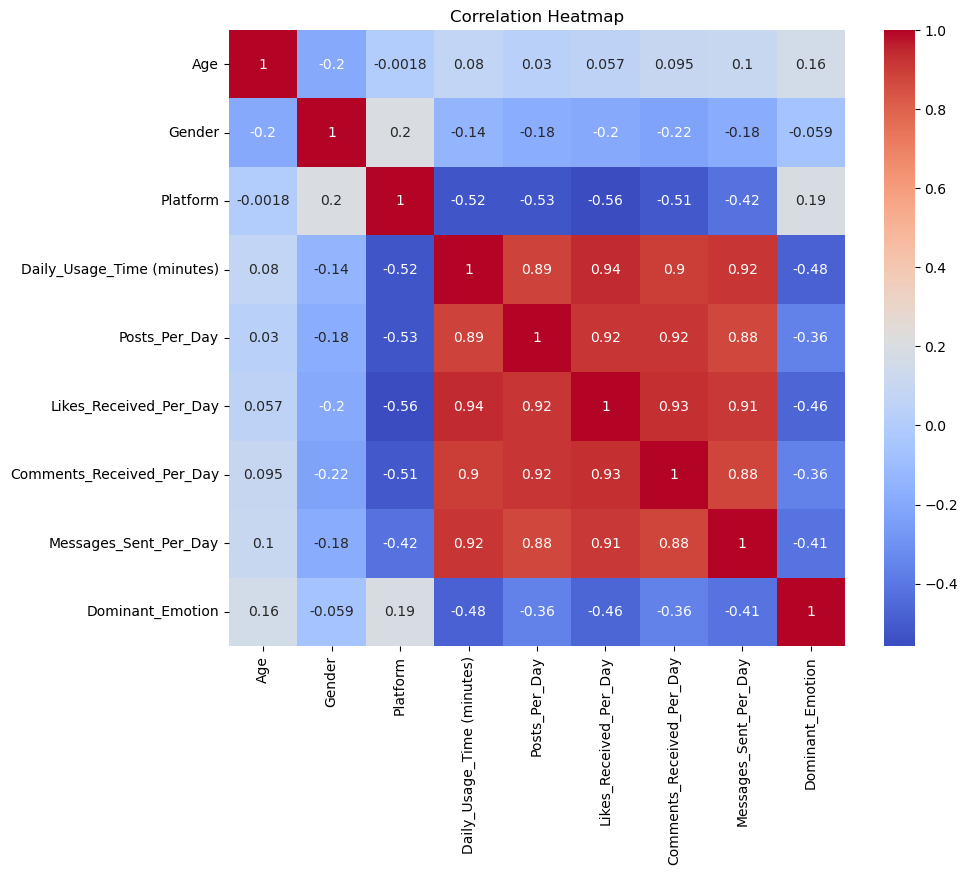

In [64]:
# Calculate the correlation matrix
corr_matrix = train_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

### Loading the dataset

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1000 non-null   float64
 1   Gender                      1000 non-null   int64  
 2   Platform                    1000 non-null   int64  
 3   Daily_Usage_Time (minutes)  1000 non-null   float64
 4   Posts_Per_Day               1000 non-null   float64
 5   Likes_Received_Per_Day      1000 non-null   float64
 6   Comments_Received_Per_Day   1000 non-null   float64
 7   Messages_Sent_Per_Day       1000 non-null   float64
 8   Dominant_Emotion            1000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 78.1 KB


In [66]:
train_df['Dominant_Emotion'] = train_df['Dominant_Emotion'].astype('int64')

0 -> Happiness

1 -> Neutral

2 -> Anxiety

3 -> Sadness 

4 -> Boredom

5 -> Anger



In [68]:
fig = px.scatter(train_df, x="Likes_Received_Per_Day", y="Dominant_Emotion", trendline="ols")
fig.show()

### Make the regression Equation

In [69]:
regression_result = st.linregress(train_df['Likes_Received_Per_Day'], train_df['Dominant_Emotion'])

In [70]:
# Calculate slope and intercept of regression equation
slope, intercept, r, p_value, std_err = st.linregress(train_df['Likes_Received_Per_Day'], train_df['Dominant_Emotion'])

print("Correlation Coefficient: {:0.3f}".format(r))
print("Coefficient of Determination: {:0.3f}".format(np.power(r, 2)))

print("Regression Equation: y = {0:0.3f} X + {1:0.3f}".format(slope, intercept))
print("p-value: {:0.3f}".format(p_value))

Correlation Coefficient: -0.461
Coefficient of Determination: 0.212
Regression Equation: y = -0.029 X + 3.404
p-value: 0.000


In [82]:
X = 
y_pred = slope * X + intercept

emotion_index = round(y_pred)
emotion_mapping = {
    0: "Happiness",
    1: "Neutral",
    2: "Anxiety",
    3: "Sadness",
    4: "Boredom",
    5: "Anger"
}

emotion = emotion_mapping.get(emotion_index, "Unknown")
print(f"If the like count exceeds {X}, then we expect the emotion is {emotion}.")

If the like count exceeds -5, then we expect the emotion is Boredom.
